<a href="https://colab.research.google.com/github/emetcalf-vas/Group19_QM2/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install spacy
!pip install scattertext
!pip install tika
!pip install spacytextblob
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 57.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [17]:
import spacy
import json
import pylab
from IPython.core.display import display, HTML
import nltk
from tika import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')


In [24]:
from tika import parser

# Specify the path to your PDF file
file_path = "hello.pdf"

# Parse the PDF using tika
raw = parser.from_file(file_path)

# Check if 'metadata' key exists before accessing it
if 'metadata' in raw and 'dcterms:created' in raw['metadata']:
    date = raw['metadata']['dcterms:created']
    print('Date: ', date)
else:
    print("Creation date not found in metadata.")

# Check if 'content' key exists before accessing it
if 'content' in raw:
    raw_text = raw['content']
    print('Word Count: ', len(raw_text))
    print('Text:')
    print(raw_text)
else:
    print("Content not found in parsed data.")

Date:  2025-01-17T16:41:58Z
Word Count:  7927
Text:

































Microsoft Word - Document1


When I moved here, I was impressed with the lot. I have a very large lot and a 
lovely home brick home. At that time, brick homes were very popular. … It 
was marketed to low and middle-income African-Americans... 

I felt like I was moving to an American dream, not knowing that my home was 
located on toxic soil.  

Residents [developed] cancer, respiratory diseases [and] rashes. I myself 
have been diagnosed with breast cancer and I'm a breast cancer survivor. We 
have had many residents who have died -- not one, but maybe two or three 
members in a family with various types of cancer.  

When I first moved back here, one of my grandsons was living with me. And I 
had a swimming pool back there and a swing set. My grandson now has 
asthma that he's had for years. 

It feels like I'm a prisoner, enslaved in my own home because I need to be 
cautious about so many things an

In [25]:
import re
global_warming = re.findall(r'health', raw_text, re.IGNORECASE)
environment =  re.findall(r'environment', raw_text, re.IGNORECASE)
climate = re.findall(r'climate', raw_text, re.IGNORECASE)
profit = re.findall(r'profit', raw_text, re.IGNORECASE)
growth = re.findall(r'growth', raw_text, re.IGNORECASE)
cancer = re.findall(r'cancer', raw_text, re.IGNORECASE)
health = re.findall(r'health', raw_text, re.IGNORECASE)

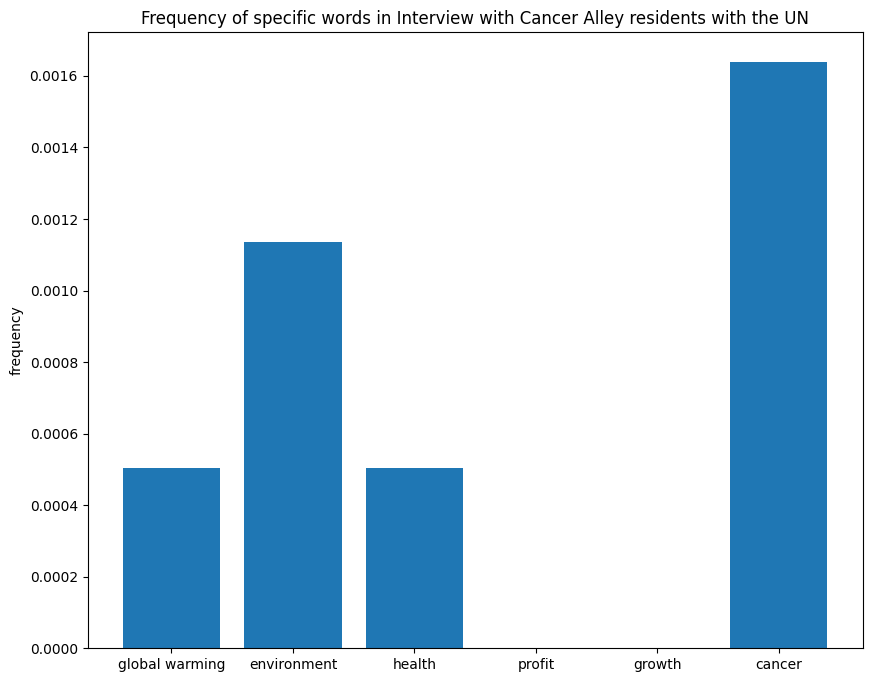

In [27]:
counts = [len(global_warming)/7927, len(environment)/7927, len(health)/7927, len(profit)/7927, len(growth)/7927, len(cancer)/7927]
terms = ["global warming", "environment", "health", "profit", "growth", "cancer"]

plt.bar(terms, counts)
plt.ylabel("frequency")
#plt.xlabel("words picked")
plt.title("Frequency of specific words in Interview with Cancer Alley residents with the UN")

plt.show()

In [28]:
!pip install nltk   # Install the NLTK library if you haven't already
import nltk
nltk.download('punkt')  # Download the 'punkt' resource for tokenization
nltk.download('stopwords')  # Download the 'stopwords' resource
# Download the missing 'punkt_tab' resource
nltk.download('punkt_tab') # This line is added to fix the error.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [22]:
# Assuming 'raw_text' contains your text data
words = word_tokenize(raw_text)   # Tokenize the text into individual words

# Remove stop words (common words like 'the', 'a', 'is', etc.)
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words and word.isalnum()]

In [29]:
word_frequencies = Counter(filtered_words)  # Count the occurrences of each word
most_common_words = word_frequencies.most_common(10)  # Get the 10 most common words

# Print the most common words
for word, frequency in most_common_words:
    print(f'{word}: {frequency}')

us: 9
cancer: 7
home: 5
breast: 5
back: 5
come: 5
community: 5
need: 4
help: 4
Parish: 4
